# Text Mining and Analysis Using Twitter Streaming API 📊

![title](img/Twitter_Text_Mining.png)

## Introduction
Text mining is the application of natural language processing techniques and analytical methods to text data in order to derive relevant information. in this following works, It shows how to collecting data from Twitter with Twitter Streaming API that allow us to capture tweets real-time filter. 

In this study case I will use #WorldCup data to compare the popularity of 4 most popularity during Fifa World Cup Russia 2018 and most football player: Cristiano Ronaldo, Neymar,Lionel Messi and Luis Suarez, and to retrieve links to the news resoruces such as tweet,website,video,youtube etc.. In the first Part, I will explaing how to connect to Twitter Streaming API and how to get the data. In the second Part, I will explain and show how to structure the data for analysis, and in the last paragraph, And Finally I will explain how to filter the data and extract links from tweets.

# -- Part 1:Getting Start with Twitter API --

## Understanding of Twitter API

API stands for Application Programming Interface. It is a tool that makes the interaction with computer programs and web services easy

## Getting Twitter API

- Create a twitter account if you do not already have one.
- Go to https://apps.twitter.com/ and log in with your twitter credentials.
- Click "Create New App"
- Fill out the form, agree to the terms, and click "Create your Twitter application"
- In the next page, click on "API keys" tab, and copy your "API key" and "API secret".
- Scroll down and click "Create my access token", and copy your "Access token" and "Access token secret".


![title](img/Cap5.png)

![title](img/Cap4.png)

![title](img/Cap6.png)

# Create Twitter streaming API file to shows the result of realtime filter streaming 

Create a file name Twitter_stream_api.py Using Tweepy library. We will be using a Python library called Tweepy to connect to Twitter Streaming API and downloading the data. If you don't have Tweepy installed in your machine, go to this <a href='https://github.com/tweepy/tweepy'> link</a>, and follow the installation instructions.

Next create, a file called twitter_streaming.py, and copy into it the code below. Make sure to enter your credentials into access_token, access_token_secret, consumer_key, and consumer_secret.

![title](img/Cap1.png)

### There are the outputs when execute the instruction from above
the output returns the value in JSON from which contain more than 100 keys in 1 tweet, I've been streaming for 2 hours to collect data form Twitter 

![title](img/Cap2.png)

# Capturing and Reading the Data

#### In order to capture  the data for the analysis. I colloect by following command to store data in txt file

 #### <span style="color:blue">python3</span>  Twitter_stream_api.py > data/worldcup2018_twitter_data.txt

![title](img/Cap3.png)

The data that we retrived is store in worldcup2018_twitter_data.txt which are JSON forfrt you can see that the tweet contain additional and more information example :

<span style="color:red" >"text"</span>:"Lionel Messi, Marcus Rojo\u2019s goals as Argentina best Nigeria

# -------------------------------------------------------------------------------------------

# -- Part 2: Structured data and analysis --

In this Part we will be using 4 Python libraries <strong>json</strong> for parsing the data, <strong>pandas</strong>  for data manipulation, <strong>matplotlib</strong> for creating charts, adn <strong>re</strong> for regular expressions we use it to check if there's specific keyword in present text or not from the commands below:

### import necessary library which contain 
- Json
- pandas
- matplotlib
- re
- matplotlib

In [2]:
%matplotlib inline
import re
import json
import pandas as pd
import matplotlib.pyplot as plt

### Read captured data from Txt File

In [3]:
#path to tweets collected data
tweets_data_path = 'data/worldcup2018_twitter_data.txt'
#open the file
tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

## Show the total captured tweet data 
using print and len ( ) function to read all count tweet data that has captured


In [4]:
print(len(tweets_data))

6008


In This data/worldcup2018_twitter_data.txt we've capture totally <strong>6008</strong> tweets from twitter

In [5]:
tweets = pd.DataFrame()

Mapping capture tweet from JSON format fileform text file into data frame 

In [6]:
tweets['text'] = list(map(lambda tweet: tweet['text'], tweets_data))

tweets['lang'] = list(map(lambda tweet: tweet['lang'], tweets_data))

tweets['country'] = list(map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweets_data))



In [7]:
tweets_by_lang = tweets['lang'].value_counts()

In [8]:
tweets_by_lang.head()

en    3894
pt     402
es     335
fr     270
ja     221
Name: lang, dtype: int64

this shows top 5 language that has been tweet 
the most tweets are in English(en) and second in Protugal(pt) and third in Spanish(es),French(fr) and Japanese(jp)

## Drawing the Graph
In order to impliment the graph we use Mathplotlib library to draw the grph which has many kind of graph.In a simple implimentation I use bar graph for showing counting result from above and finding top 10 Languages from 60008 tweets that's captured

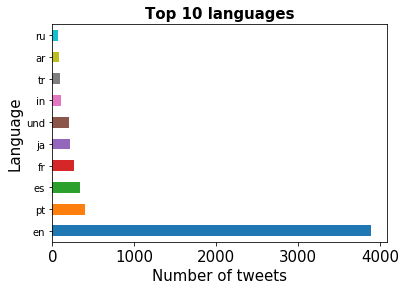

In [9]:
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Number of tweets', fontsize=15)
ax.set_ylabel('Language' , fontsize=15)
ax.set_title('Top 10 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:10].plot(ax=ax, kind='barh') 

Showing different result in different kind of graph in <strong>Pie Graph</strong>

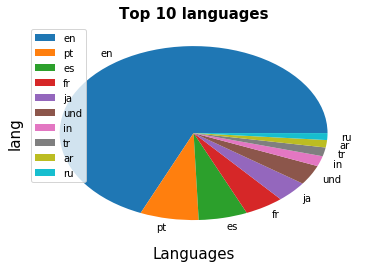

In [10]:
tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 10 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:10].plot(ax=ax, kind='pie',legend=True)

Drawing a Graph for 10 countries that tweet about '#WorldCup2'

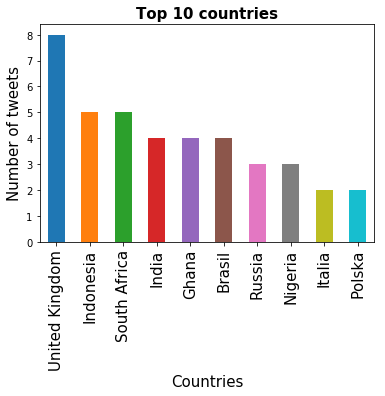

In [11]:
tweets_by_country = tweets['country'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Countries', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 10 countries', fontsize=15, fontweight='bold')
tweets_by_country[:10].plot(ax=ax, kind='bar')

# -------------------------------------------------------------------------------------------

# -- Part 3:Text Mining and Extracting Link -- 

Our main goals in these text mining tasks are: compare the popularity of Cristiano Ronaldo, Luis Suarez Neymar programming languages and to retrieve programming tutorial links. We will do this in 3 steps:

- We will add tags to our tweets DataFrame in order to be able to manipualte the data easily.
- Target tweets that have "WorldCup" or "Fifa" keywords.
- Extract links from the relevants tweets

Defind the function to convert all text that contain Capital and mixing text to lower case also using search function to find word in column text

In [12]:
def word_in_text(word,text):
    word = word.lower()
    text = text.lower()
    match = re.search(word,text)
    if match :
        return True
    return False

In [13]:
tweets['Cristiano Ronaldo'] =list(tweets['text'].apply(lambda tweet: word_in_text('Cristiano Ronaldo', tweet)))
tweets['Luis Suarez'] =list(tweets['text'].apply(lambda tweet: word_in_text('Luis Suarez', tweet)))
tweets['Neymar'] =list(tweets['text'].apply(lambda tweet: word_in_text('Neymar', tweet)))
tweets['Lionel Messi'] =list(tweets['text'].apply(lambda tweet: word_in_text('Lionel Messi', tweet)))
tweets['#WorldCup'] =list(tweets['text'].apply(lambda tweet: word_in_text('#WorldCup', tweet)))



In [14]:
#print all count False means not appear in Tweets and True means appear in Tweets
print(tweets['Cristiano Ronaldo'].value_counts())
print(tweets['Luis Suarez'].value_counts())
print(tweets['Neymar'].value_counts())
print(tweets['Lionel Messi'].value_counts())
print(tweets['#WorldCup'].value_counts())




False    5756
True      252
Name: Cristiano Ronaldo, dtype: int64
False    6000
True        8
Name: Luis Suarez, dtype: int64
False    5634
True      374
Name: Neymar, dtype: int64
False    5340
True      668
Name: Lionel Messi, dtype: int64
False    3569
True     2439
Name: #WorldCup, dtype: int64


In [15]:
CR = tweets['Cristiano Ronaldo'].value_counts()[True]
LS = tweets['Luis Suarez'].value_counts()[True]
NM = tweets['Neymar'].value_counts()[True]
LM = tweets['Lionel Messi'].value_counts()[True]

In [16]:
print("total tweets of Cristiano Ronaldo are \n",CR,"tweets") #print total count of Cristiano Ronaldo
print("total tweets of Luis Suarezare \n",LS,"tweets"),#print total count of Luis Suarez
print("total tweets of Neymar \n",NM,"tweets")#print total count of Neymar
print("total tweets of Neymar Lionel Messi \n",LM,"tweets")#print total count of Lionel Messi


total tweets of Cristiano Ronaldo are 
 252 tweets
total tweets of Luis Suarezare 
 8 tweets
total tweets of Neymar 
 374 tweets
total tweets of Neymar Lionel Messi 
 668 tweets


## Ranking
to show all ranking of popularity on football player from above

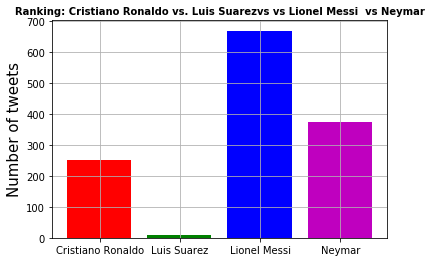

In [17]:
Fb_player = ['Cristiano Ronaldo', 'Luis Suarez', 'Lionel Messi','Neymar']
tweets_by_Fb_player = [CR,LS,LM,NM]
x_pos = list(range(len(Fb_player)))
width = 0.8
fig, ax = plt.subplots()
#ploting graph of tweets_by_Fb_player
pack_color = 'rgbm'
plt.bar(x_pos, tweets_by_Fb_player, width, alpha=1,color=pack_color)
# Setting axis labels and ticks
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Ranking: Cristiano Ronaldo vs. Luis Suarezvs vs Lionel Messi  vs Neymar', fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.01 * width for p in x_pos])
ax.set_xticklabels(Fb_player)
plt.grid()


## Specifying Relevant Tweet text
In this part I'll try to specifying the keywor in order to match football players who were mention during the WorldCup 2018 with keywords 'FiFa2018' or'World Cup' or 'WorldCup'

Mapping keywords of Fifa2018 and Worldcup that appear in text <span style=color>relevant that take value True if the tweet has either "programming" or "tutorial" keyword, otherwise it takes value False.

In [18]:
#Mapping keywords of Fifa2018 and Worldcup that appear in text
tweets['FIFA2018'] =list(tweets['text'].apply(lambda tweet: word_in_text('FIFA2018', tweet)))
tweets['World Cup'] =list(tweets['text'].apply(lambda tweet: word_in_text('World Cup', tweet)))

Create Relevent to apply with words in text that appear on tweets 

In [19]:
tweets['relevant'] = tweets['text'].apply(lambda tweet: word_in_text('FIFA2018', tweet) or 
                                          word_in_text('World Cup', tweet))                        

In [20]:
#print keyword and Count values that appear in Captured Tweet
print(tweets['relevant'].value_counts())
print(tweets['FIFA2018'].value_counts())
print(tweets['World Cup'].value_counts())

False    5692
True      316
Name: relevant, dtype: int64
False    6005
True        3
Name: FIFA2018, dtype: int64
False    5695
True      313
Name: World Cup, dtype: int64


Showing Matching keyword and Football player name values that appear in Captured Tweet

In [21]:
#print Matching keyword and Football player name values that appear in Captured Tweet
print(tweets[tweets['relevant'] == True]['Cristiano Ronaldo'].value_counts())
print(tweets[tweets['relevant'] == True]['Luis Suarez'].value_counts())
print(tweets[tweets['relevant'] == True]['Neymar'].value_counts())
print(tweets[tweets['relevant'] == True]['Lionel Messi'].value_counts())

False    305
True      11
Name: Cristiano Ronaldo, dtype: int64
False    314
True       2
Name: Luis Suarez, dtype: int64
False    311
True       5
Name: Neymar, dtype: int64
False    244
True      72
Name: Lionel Messi, dtype: int64


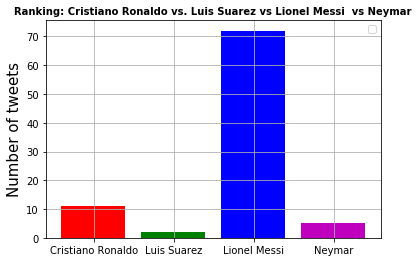

In [22]:
R_tweets_by_Fb_player = [tweets[tweets['relevant'] == True]['Cristiano Ronaldo'].value_counts()[True], 
                      tweets[tweets['relevant'] == True]['Luis Suarez'].value_counts()[True], 
                       tweets[tweets['relevant'] == True]['Lionel Messi'].value_counts()[True],
                      tweets[tweets['relevant'] == True]['Neymar'].value_counts()[True],
                     ]
x_pos = list(range(len(R_tweets_by_Fb_player)))
width = 0.8
fig, ax = plt.subplots()
plt.legend(R_tweets_by_Fb_player)
plt.bar(x_pos, R_tweets_by_Fb_player, width,alpha=1,color=pack_color)
# Setting axis labels and ticks
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Ranking: Cristiano Ronaldo vs. Luis Suarez vs Lionel Messi  vs Neymar', fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.01 * width for p in x_pos])
ax.set_xticklabels(Fb_player)
plt.grid()

# Extracting links from the relevants tweets


In this part we extracted the relevant tweets, we want to retrieve links to programming tutorials. We will start by creating a function that uses regular expressions for retrieving link that start with "http://" or "https://" from a text. This function will return the url if found, otherwise it returns an empty string.

In [23]:
def extract_link(text):
    regex = 'https?://[^\s<>"]+|www\.[^\s<>"]+'
    match = re.search(regex, text)
    if match:
        return match.group()
    return ''

Next, we will add a column called link to our tweets DataFrame. This column will contain the urls information.

In [24]:
tweets['link'] = tweets['text'].apply(lambda tweet: extract_link(tweet))


Next we will create a new DataFrame called tweets_relevant_with_link. This DataFrame is a subset of tweets DataFrame and contains all relevant tweets that have a link.

In [25]:
tweets_relevant = tweets[tweets['relevant'] == True]
tweets_relevant_with_link = tweets_relevant[tweets_relevant['link'] != '']

We can now print out all links for football player by executing the commands below that contain all football players: 

In [26]:
print("---------Link of Cristiano Ronaldo---------")
print(tweets_relevant_with_link[tweets_relevant_with_link['Cristiano Ronaldo'] == True]['link'])
print("---------Link of Luis Suarez---------")
print(tweets_relevant_with_link[tweets_relevant_with_link['Luis Suarez'] == True]['link'])
print("---------Lionel Messi---------")
print(tweets_relevant_with_link[tweets_relevant_with_link['Lionel Messi'] == True]['link'])
print("---------Link of Neymar---------")
print(tweets_relevant_with_link[tweets_relevant_with_link['Neymar'] == True]['link'])

---------Link of Cristiano Ronaldo---------
373     https://t.co/xYNBU3idcK
1352    https://t.co/eYWpsJ7XLn
4905    https://t.co/pIqKs66R4H
4915    https://t.co/1flncGqa2l
5710    https://t.co/zGbL1BtDiK
Name: link, dtype: object
---------Link of Luis Suarez---------
1573    https://t.co/g7xaLpMJZL
5965          https://t.co/8rA…
Name: link, dtype: object
---------Lionel Messi---------
373     https://t.co/xYNBU3idcK
375     https://t.co/XncHQxy9u3
448     https://t.co/jEWLT0qasF
509     https://t.co/WGWOJvpVX3
776     https://t.co/JHpoMbdSV4
1080    https://t.co/LqI9wCxuha
1313                https://t.…
1428        https://t.co/WfiyW…
1581        https://t.co/HfG9G…
1658    https://t.co/wtMkMSeDrz
1681    https://t.co/qnxlZ9ndY3
1984    https://t.co/zo9LJWVlOA
2224    https://t.co/pARNK1dJje
2298    https://t.co/NsefOoLFAT
2304    https://t.co/XncHQxy9u3
2337    https://t.co/zo9LJWVlOA
2344    https://t.co/7445uioON9
2732    https://t.co/1EEWindnyk
2813    https://t.co/NKfIikecJR
287

## Results

![title](img/Ronaldo.png)
![title](img/Ronaldo2.png)

![title](img/Suarez.png)

![title](img/Messi.png)

![title](img/Neymar.png)

# Reference
- https://matplotlib.org
- https://apps.twitter.com
- https://developer.twitter.com
- http://www.tweepy.org
- http://en.wikipedia.org/wiki/Text_mining
- http://en.wikipedia.org/wiki/Word-sense_disambiguation
- http://en.wikipedia.org/wiki/Regular_expression

# -------------------------------------------------------------------------------------------